# Preprocessing

In this notebook, we review preprocessing in scikit-learn.

<a href="https://colab.research.google.com/github/thomasjpfan/ml-workshop-intro/blob/master/notebooks/03-preprocessing.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [1]:
# Install dependencies for google colab
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    %pip install -r https://raw.githubusercontent.com/thomasjpfan/ml-workshop-intro/master/requirements.txt

In [2]:
import sklearn
assert sklearn.__version__.startswith("1.0"), "Plese install scikit-learn 1.0"

In [3]:
import seaborn as sns
sns.set_theme(context="notebook", font_scale=1.4,
              rc={"figure.constrained_layout.use": True,
                  "figure.figsize": [10, 6]})

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

boston = fetch_openml(data_id=531, as_frame=True)
boston_df = boston.frame

In [5]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

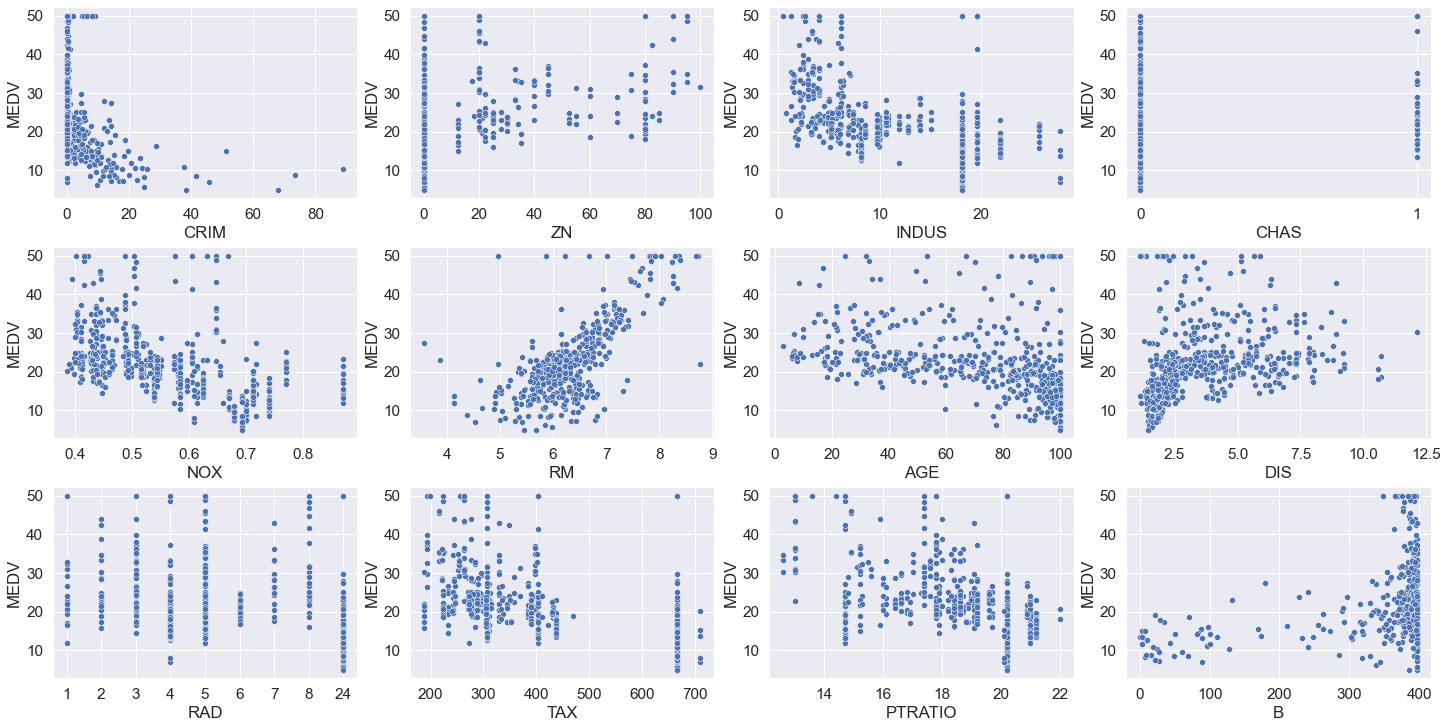

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(20, 10))

for name, ax in zip(boston.feature_names, axes.ravel()):
    sns.scatterplot(x=name, y='MEDV', ax=ax, data=boston_df)

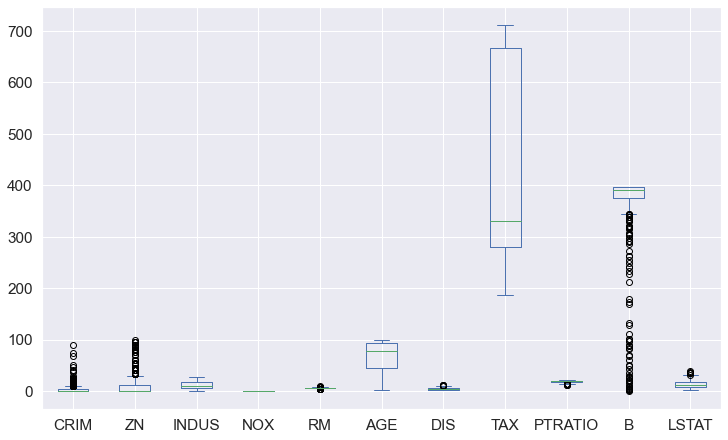

In [7]:
boston_df[boston.feature_names].plot(kind='box');

## Model without scaling

Remove categories for this example

In [8]:
X = boston.data.select_dtypes(include="number")
y = boston.target

In [9]:
feature_names = X.columns

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor().fit(X_train, y_train)
knr.score(X_train, y_train)

0.6688150493731024

In [12]:
knr.score(X_test, y_test)

0.625165910528835

## Model with scaling

### Scale first!

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
import pandas as pd
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)

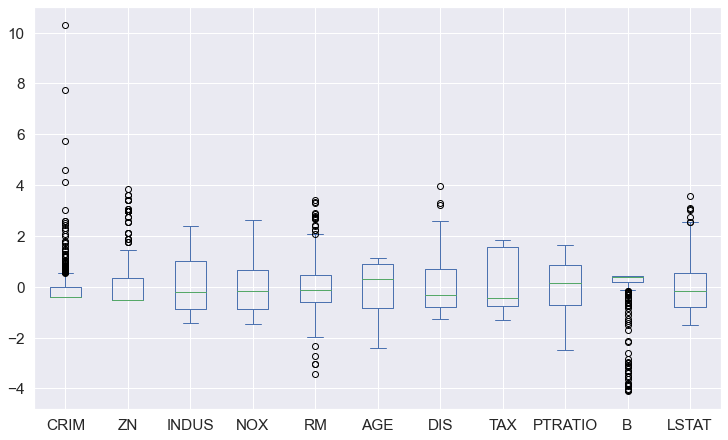

In [15]:
X_train_scaled_df.plot(kind='box');

### Train model on scaled data

In [16]:
knr = KNeighborsRegressor().fit(X_train_scaled, y_train)
knr.score(X_train_scaled, y_train)

0.8830386434720664

In [17]:
X_test_scaled = scaler.transform(X_test)
knr.score(X_test_scaled, y_test)

0.8020480077431158

## Exercise 1

1. Train a `sklearn.svm.SVR` model on the unscaled training data and evaluate on the unscaled test data.
2. Train the same model on the scaled data and evalute on the scaled test data.
3. Does scaling the data change the performance of the model?

In [20]:
# %load https://raw.githubusercontent.com/thomasjpfan/ml-workshop-intro/master/notebooks/solutions/03-ex1-solution.py

## Tree based models

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(random_state=0, max_depth=3).fit(X_train, y_train)
tree.score(X_test, y_test)

In [ ]:
tree_scaled = DecisionTreeRegressor(random_state=0, max_depth=3).fit(X_train_scaled, y_train)
tree_scaled.score(X_test_scaled, y_test)

### Why are the scores the same?

In [ ]:
from sklearn.tree import plot_tree
sns.reset_orig()
fig, ax = plt.subplots(figsize=(20, 10))
_ = plot_tree(tree, ax=ax, fontsize=16, feature_names=feature_names)

In [ ]:
from sklearn.tree import plot_tree
sns.reset_orig()
fig, ax = plt.subplots(figsize=(20, 10))
_ = plot_tree(tree_scaled, ax=ax, fontsize=16, feature_names=feature_names)